# Júlia Vieira Barbosa, RA: 791713

## LAB1 - Classificação

In [ ]:
# 1. Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
# 2. Carregar o dataset salvo
df = pd.read_csv("dataset.csv")

# Separar variáveis explicativas e alvo
# Variáveis Explicativas
X = df.drop(columns=['y']) #x1,x2,...,x10
# Variável Resposta
y = df['y']


In [ ]:
# 3. Dividir em treino e teste
# Use stratify=y para manter o desbalanceamento nas duas partes
# X_train, X_test, y_train, y_test = train_test_split(... stratify=y)
# 0.7 Treino e 0.3 Teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# 4. Treinar modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 5. Gerar previsões com threshold 0.5
y_proba = modelo.predict_proba(X_test)[:, 1] # Probabilidades para a classe 1
y_pred = (y_proba >= 0.5).astype(int) # threshold 0.5 para converter para 0 ou 1

In [ ]:
# 6. Construir matriz de confusão
# A partir da matriz, os alunos devem calcular manualmente: acurácia, precisão, recall e F1-score
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matriz)

Matriz de Confusão:
[[266   0]
 [ 22  12]]


In [ ]:
VN = 266
FP = 0
FN = 22
VP = 12

In [ ]:
acuracia = (VP+VN)/(VP+VN+FP+FN)
print(acuracia)

0.9266666666666666


In [ ]:
precisao = VP/(VP+FP)
print(precisao)

1.0


In [ ]:
recall = VP/(VP+FN)
print(recall)

0.35294117647058826


In [ ]:
f1_score = 2*(precisao*recall)/(precisao+recall)
print(f1_score)

0.5217391304347826


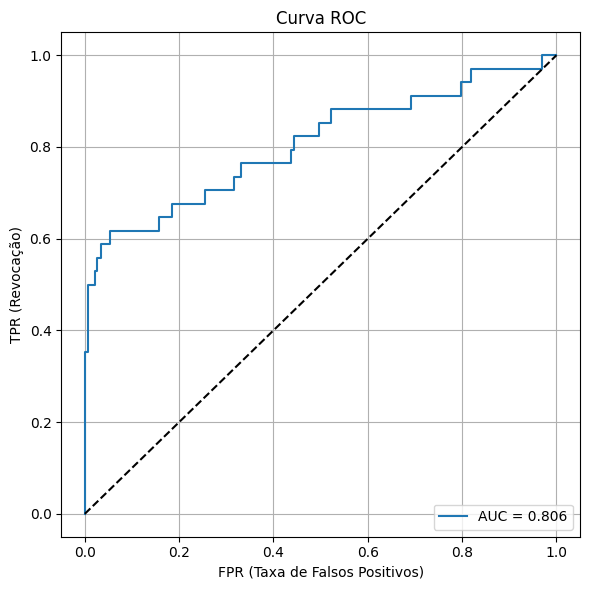

In [ ]:
# 7. Plotar curva ROC e calcular AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr) #auc

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 9. Desafio: encontrar o melhor threshold com base no F1-score

# a) Crie uma lista de thresholds entre 0 e 1 (ex: np.linspace(0, 1, 100))
thresholds = np.linspace(0, 1, 100)
print(thresholds)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [ ]:
# b) Para cada threshold, calcule as previsões binárias e a matriz de confusão

# c) A partir da matriz, calcule manualmente:
#    - precisão = ...
#    - recall   = ...
#    - f1       = ...

# d) Guarde o F1-score para cada threshold

f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int) #Previsao
    VN, FP, FN, VP = confusion_matrix(y_test, y_pred_thresh).ravel() #Matriz de confusao

    precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
    recall = VP / (VP + FN) if (VP + FN) > 0 else 0
    f1 = (2 * precisao * recall) / (precisao + recall) if (precisao + recall) > 0 else 0

    f1_scores.append(f1)

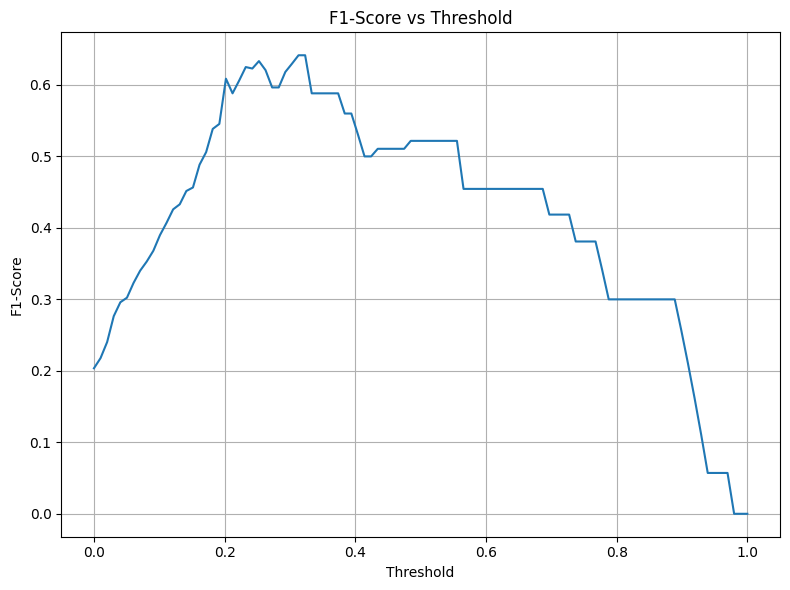

In [ ]:
# e) Plote o gráfico do F1-score em função do threshold
#    Isso ajuda a visualizar qual valor produz o melhor equilíbrio entre precisão e recall

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1-Score")
plt.title("F1-Score vs Threshold")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# f) Escolha o melhor threshold e refaça a matriz de confusão final

#O melhor é o que tem maior F1

best_threshold = thresholds[np.argmax(f1_scores)] #Maximo
print(best_threshold)Solte arquivos aqui para fazer upload deles no armazenamento da sessão.
datase

0.31313131313131315


In [ ]:
#Refazendo a matriz de confusao com o melhor threshold
y_pred_best = (y_proba >= best_threshold).astype(int)
matriz_best = confusion_matrix(y_test, y_pred_best)
print(matriz_best)

[[264   2]
 [ 17  17]]


## LAB1 - Regressão

In [10]:
import pandas as pd

In [11]:
df1 = pd.read_csv("boston.csv", usecols=lambda column: column != 'Unnamed: 0')

In [12]:
df1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,unkw
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,183.351902
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,148.515041
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,383.285055
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,355.104250
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,417.138310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,159.719879
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,135.081967
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,181.827153
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,154.066529


Os dados contêm as seguintes colunas:

**crim**: taxa de criminalidade per capita por cidade.

**zn**: proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés².

**indus**: proporção de acres com negócios não varejistas por cidade.

**chas**: variável indicadora do Rio Charles (= 1 se o setor faz fronteira com o rio; 0 caso contrário).

**nox**: concentração de óxidos de nitrogênio (partes por 10 milhões).
**rm**: número médio de cômodos por residência.

**age**: proporção de unidades ocupadas pelos proprietários construídas antes de 1940.

**dis**: média ponderada das distâncias até cinco centros de emprego em Boston.

**rad**: índice de acessibilidade a rodovias radiais.

**tax**: taxa de imposto sobre propriedade com valor total por $10.000.

**ptratio**: razão aluno-professor por cidade.

**lstat**: percentual da população de menor status socioeconômico.

**unkn**: uma variável desconhecida que pode ou não ser útil para o modelo.

**medv**: valor mediano das residências ocupadas por proprietários (em milhares de dólares).

Seu objetivo é utilizar as técnicas vistas em sala para aprender uma função para prever medv

In [13]:
# Imports necessários
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [14]:
X1 = df1.drop(columns=['medv'])  #Variaveis explicativas
y1 = df1['medv']                 #Variável resposta

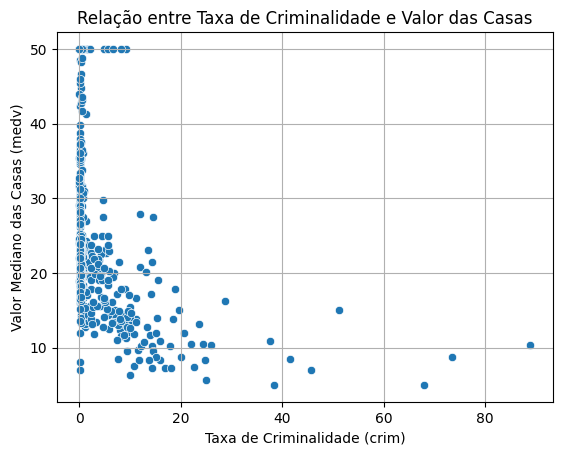

In [15]:
# 2. Visualizar os dados
# Use scatterplot para ver a relação entre X e Y

#crim
sns.scatterplot(x=X1['crim'], y=y1)
plt.xlabel("Taxa de Criminalidade (crim)")
plt.ylabel("Valor Mediano das Casas (medv)")
plt.title("Relação entre Taxa de Criminalidade e Valor das Casas")
plt.grid(True)
plt.show()

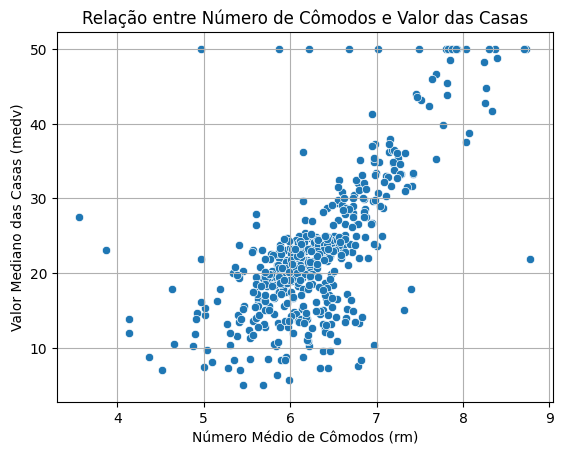

In [16]:
#rm
sns.scatterplot(x=X1['rm'], y=y1)
plt.xlabel("Número Médio de Cômodos (rm)")
plt.ylabel("Valor Mediano das Casas (medv)")
plt.title("Relação entre Número de Cômodos e Valor das Casas")
plt.grid(True)
plt.show()

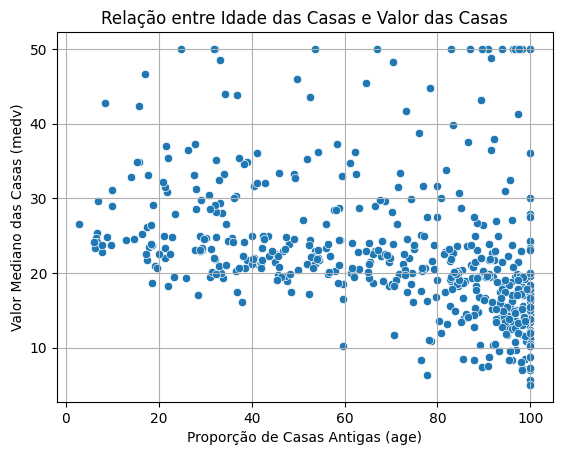

In [17]:
#age
sns.scatterplot(x=X1['age'], y=y1)
plt.xlabel("Proporção de Casas Antigas (age)")
plt.ylabel("Valor Mediano das Casas (medv)")
plt.title("Relação entre Idade das Casas e Valor das Casas")
plt.grid(True)
plt.show()

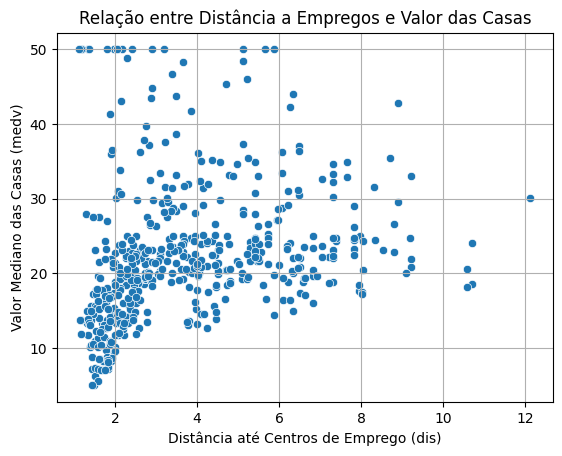

In [18]:
#dis
sns.scatterplot(x=X1['dis'], y=y1)
plt.xlabel("Distância até Centros de Emprego (dis)")
plt.ylabel("Valor Mediano das Casas (medv)")
plt.title("Relação entre Distância a Empregos e Valor das Casas")
plt.grid(True)
plt.show()

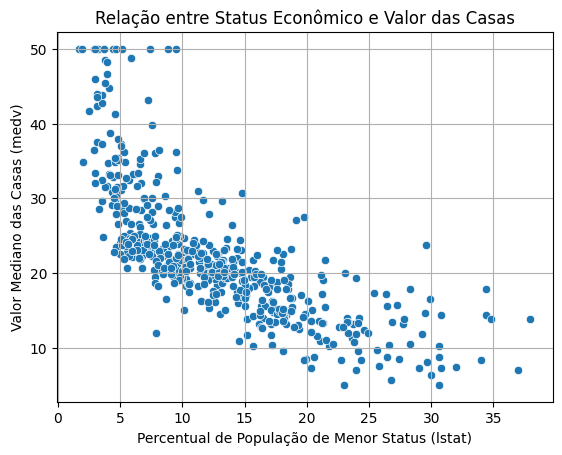

In [19]:
#lstat
sns.scatterplot(x=X1['lstat'], y=y1)
plt.xlabel("Percentual de População de Menor Status (lstat)")
plt.ylabel("Valor Mediano das Casas (medv)")
plt.title("Relação entre Status Econômico e Valor das Casas")
plt.grid(True)
plt.show()

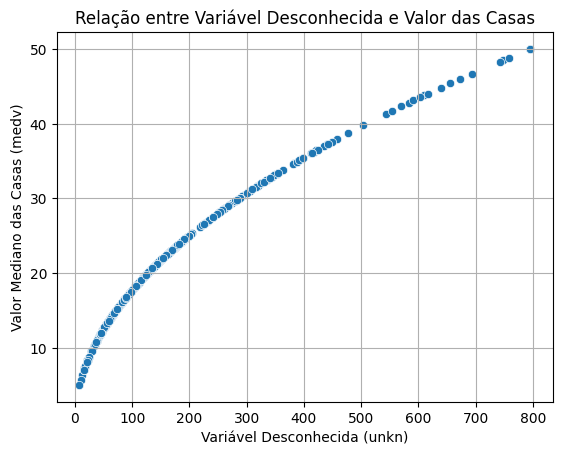

In [20]:
#unkw
sns.scatterplot(x=X1['unkw'], y=y1)
plt.xlabel("Variável Desconhecida (unkn)")
plt.ylabel("Valor Mediano das Casas (medv)")
plt.title("Relação entre Variável Desconhecida e Valor das Casas")
plt.grid(True)
plt.show()

Comentário: Relação não parece linear

In [21]:
#3. Treino e Teste
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [22]:
#4. Ajustar modelo linear
modelo_linear = LinearRegression()
modelo_linear.fit(X1_train, y1_train)

LinearRegression()

In [23]:
#5. Previsões e Avaliar modelo linear
y1_pred_linear = modelo_linear.predict(X1_test) #Previsoes com x de teste

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2_linear = r2_score(y1_test, y1_pred_linear) #coef de determinacao
mse_linear = mean_squared_error(y1_test, y1_pred_linear) #erro
rmse_linear = np.sqrt(mse_linear)

print(r2_linear)
print(rmse_linear)

0.9751819068841965
1.359879753562826


Coeficiente de determinação bom, o modelo explica 97,5% da variação do valor das casas (medv) com base nas variáveis explicativas (X1).
O modelo erra em média 1.359 mil dólares para cada casa.

Vamos tentar ajuste polinomial pra ver se ajusta ainda melhor:

In [24]:
#6. Regressão Polinomial
polinomial = PolynomialFeatures(degree=2)

X1_train_polinomial = polinomial.fit_transform(X1_train)
X1_test_polinomial = polinomial.transform(X1_test)

modelo_polinomial = LinearRegression()
modelo_polinomial.fit(X1_train_polinomial, y1_train)

LinearRegression()

In [25]:
#Resultados Regressão Polinomial
y1_pred_polinomial = modelo_polinomial.predict(X1_test_polinomial)

r2_polionomial = r2_score(y1_test, y1_pred_polinomial)
mse_polinomial = mean_squared_error(y1_test, y1_pred_polinomial)
rmse_polinomial = np.sqrt(mse_polinomial)

print(r2_polionomial)
print(rmse_polinomial)

0.9927567307992663
0.734655300244993


Coeficiente de determinação ainda melhor, o modelo explica 97,5% da variação do valor das casas (medv) com base nas variáveis explicativas (X1).
O modelo erra em média 0.735 mil dólares para cada casa. Isso pode se dar pela presença de uma variável que não parece ter relação linear com a variável resposta.

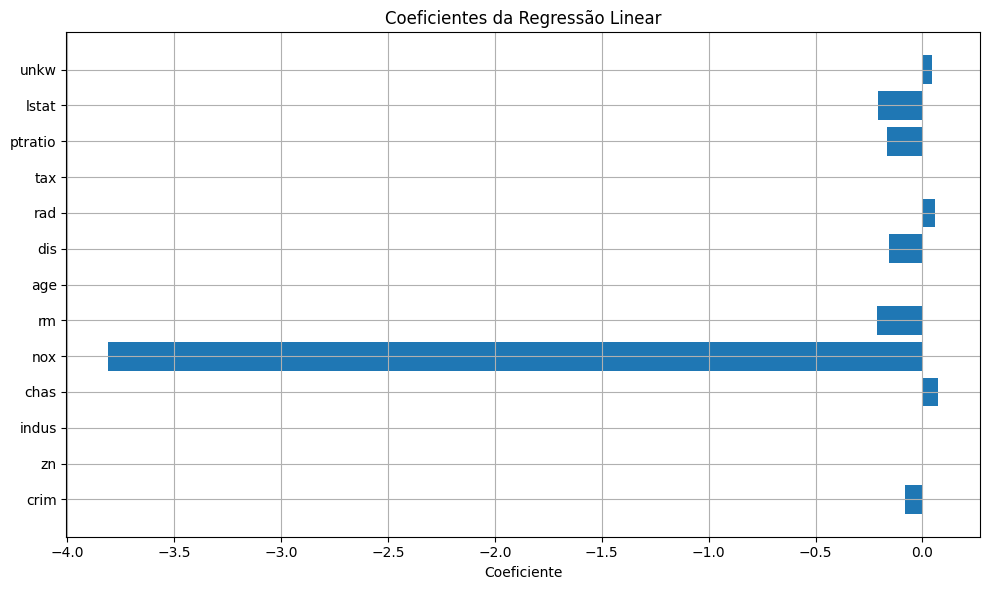

In [26]:
# 8. Coeficientes do modelo

coeficientes = modelo_linear.coef_
nomes = X1.columns  # nomes das variáveis

plt.figure(figsize=(10,6))
plt.barh(nomes, coeficientes)
plt.xlabel("Coeficiente")
plt.title("Coeficientes da Regressão Linear")
plt.grid(True)
plt.tight_layout()
plt.show()
